In [120]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

## __1 - Business Problem__  
___Prepare a classification model using Naive Bayes for salary data___  

## __2 - Data collection and description__ 

In [121]:
df=pd.read_csv('SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3 - EDA on TRAIN data set

In [122]:
df.shape

(30161, 14)

train dataset has 30161 rows and 14 columns,that so big

In [123]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


No Missing values and datatype also identified accuretly

In [125]:
# missing value by applying function
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [126]:
# checking unique category in each column of dataset
df.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

train dataset has 9 categorical columns ehic has repetitive values and 5 numerical columns which has contineous values.

In [127]:
# Summary of numerical attributes:
# In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [128]:
# checking duplicate rows
df.duplicated().sum()

3258

train dataset has 3258 duplicate rows,so we need to drop them to train model accuratly.

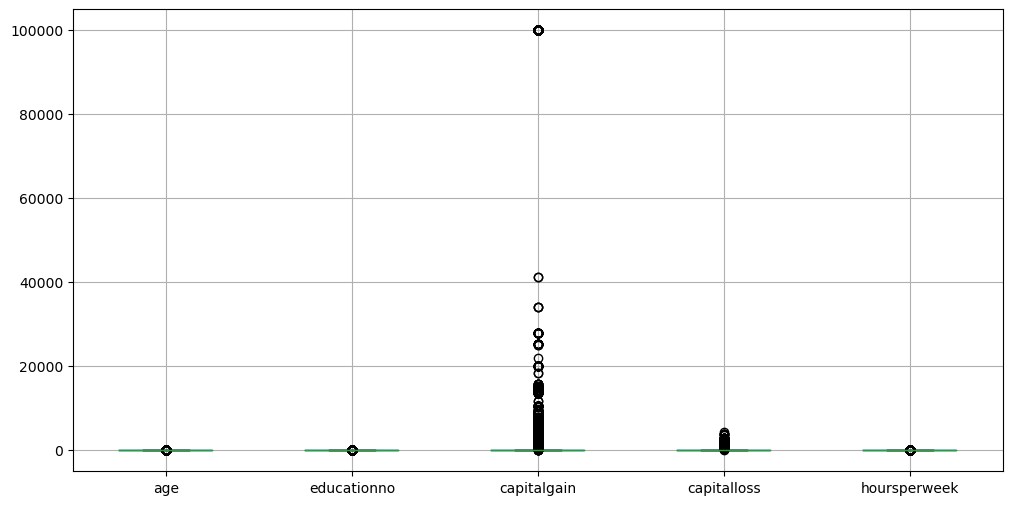

In [129]:
# Lets check outliers with boxplot
plt.figure(figsize=(12,6))
df.boxplot()
plt.show();

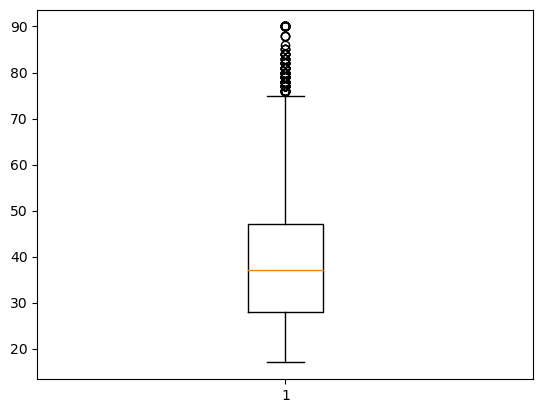

In [130]:
box=plt.boxplot(df['age'])
plt.show();

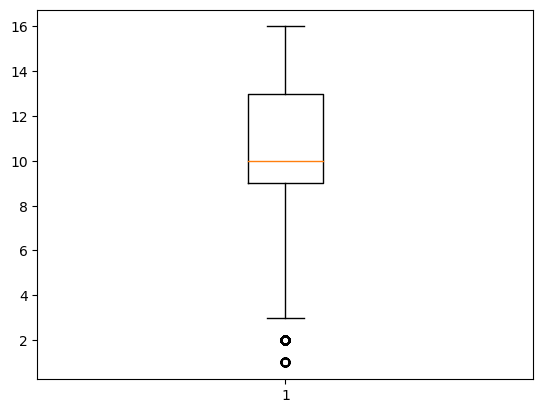

In [131]:
box1=plt.boxplot(df['educationno'])
plt.show();

distribution is left skewed with majority of data is between 9 to 13 with few outliers on lower limit of boxplot

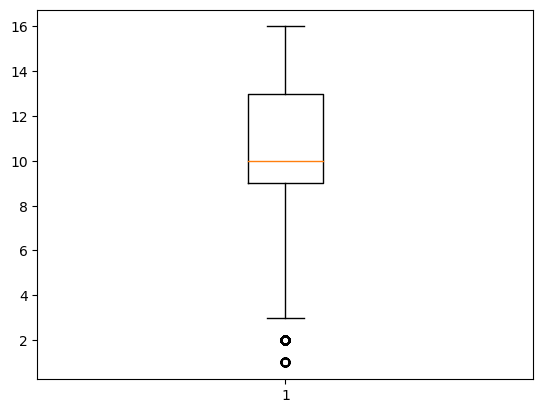

In [132]:
box1=plt.boxplot(df['educationno'])
plt.show();

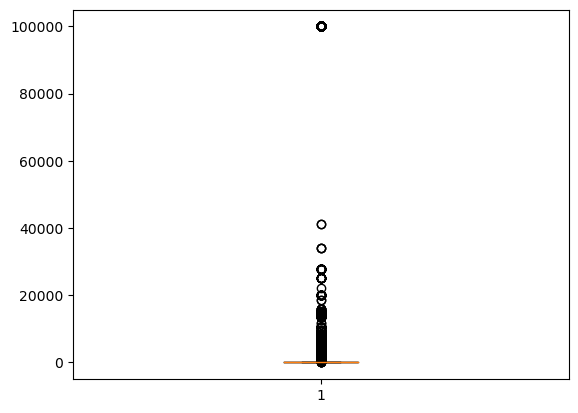

In [133]:
box2=plt.boxplot(df['capitalgain'])
plt.show();

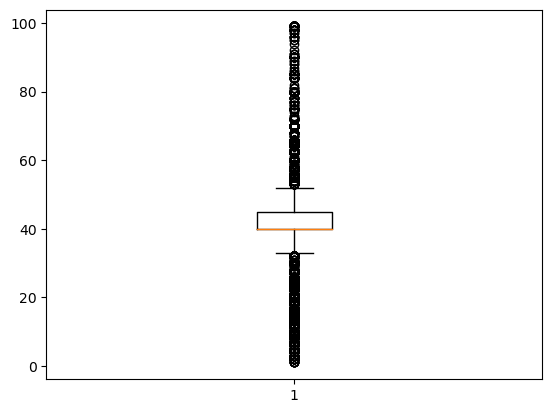

In [134]:
box4=plt.boxplot(df['hoursperweek'])
plt.show();

distribution has outliers on both side with almost normally disributed has mean value 42

In [135]:
# data transformation
df.skew()

C:\Users\Yash Shinde\AppData\Local\Temp\ipykernel_22136\4209787060.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age              0.530180
educationno     -0.305378
capitalgain     11.902483
capitalloss      4.528238
hoursperweek     0.330856
dtype: float64

capitalgain and capitalloss has high skew values

<Figure size 1200x600 with 0 Axes>

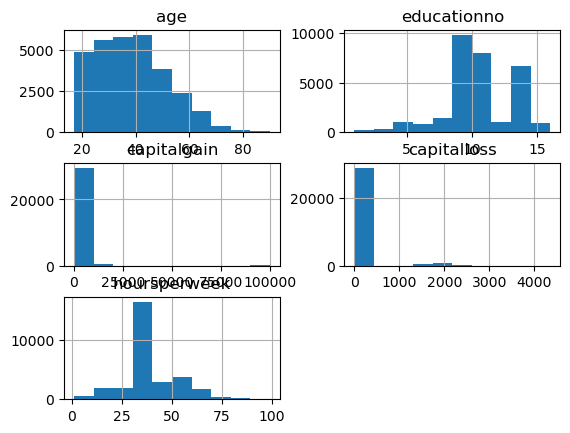

In [136]:
# lets see skewness with the help of histogram
plt.figure(figsize=(12,6))
df.hist()
plt.show();

<AxesSubplot:>

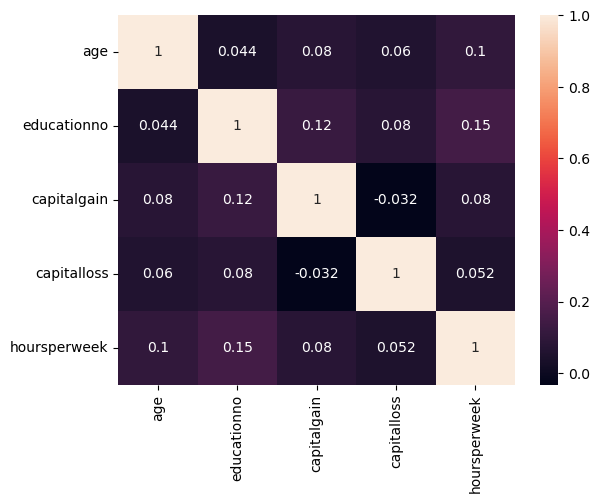

In [137]:
sns.heatmap(df.corr(),annot=True)

applying sqrt on both capitalgain and capitalloss column

In [138]:
df1=pd.read_csv('SalaryData_Test.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 4 - EDA on TEST data set

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [140]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [141]:
# checking duplicate rows
df1.duplicated().sum()

930

In [142]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


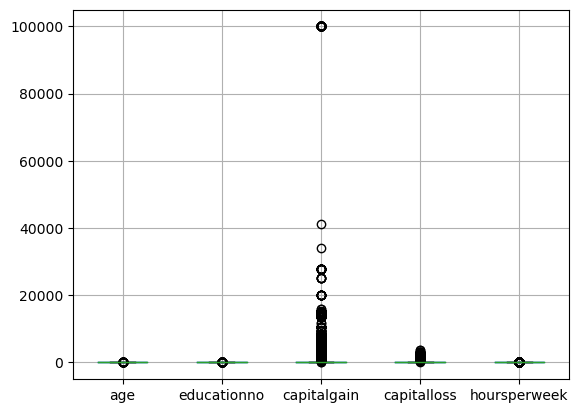

In [143]:
df1.boxplot()
plt.show()

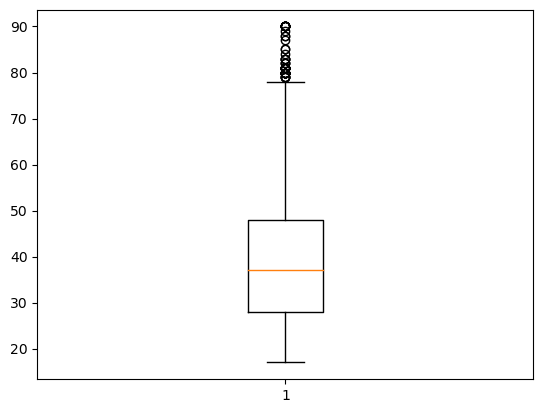

In [144]:
box=plt.boxplot(df1['age'])
plt.show();

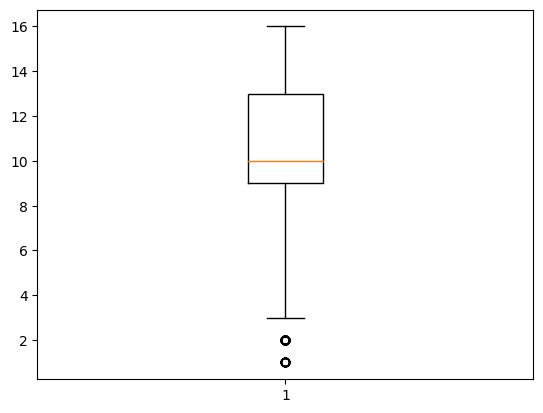

In [145]:
box1=plt.boxplot(df1['educationno'])
plt.show();

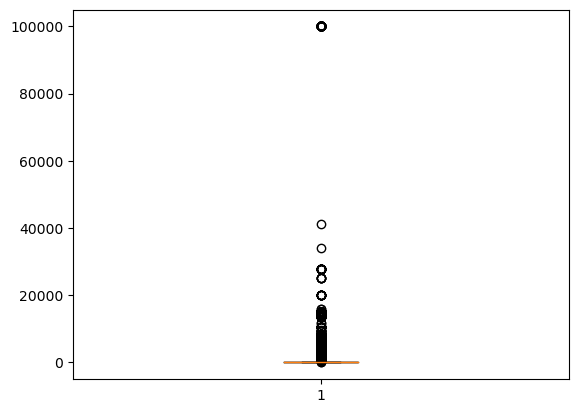

In [146]:
box2=plt.boxplot(df1['capitalgain'])
plt.show();

<Figure size 1200x600 with 0 Axes>

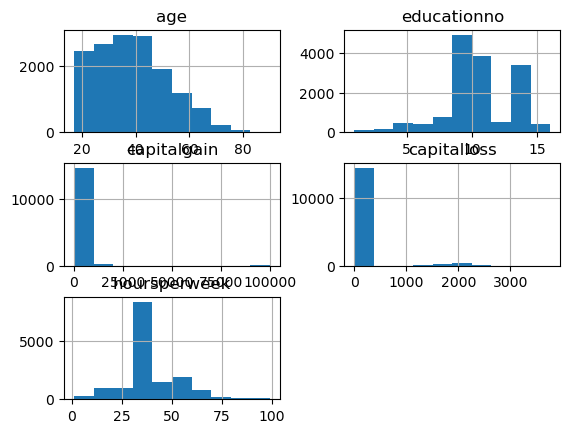

In [147]:
plt.figure(figsize=(12,6))
df1.hist()
plt.show();

<AxesSubplot:>

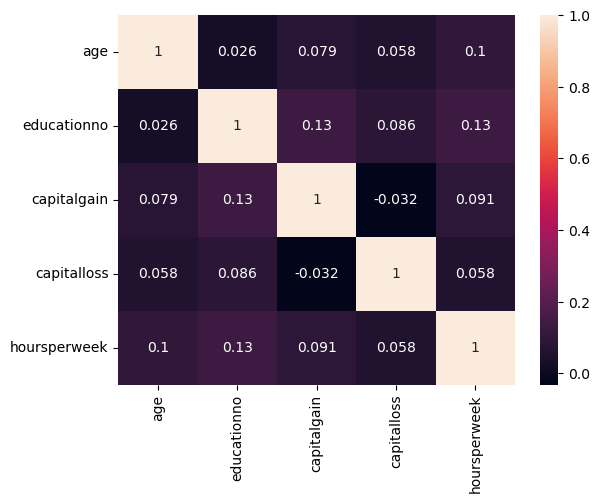

In [148]:
sns.heatmap(df1.corr(),annot=True)

## 5 - Importing training dataset

In [149]:
train = pd.read_csv("SalaryData_Train.csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 6 - LABEL ENCODING FOR TRAIN DATA

In [150]:
#LABEL ENCODER
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
train['workclass']= label_encoder.fit_transform(train['workclass'])
train['education']= label_encoder.fit_transform(train['education'])
train['maritalstatus']= label_encoder.fit_transform(train['maritalstatus'])
train['occupation']= label_encoder.fit_transform(train['occupation'])
train['relationship']= label_encoder.fit_transform(train['relationship'])
train['race']= label_encoder.fit_transform(train['race'])
train['sex']= label_encoder.fit_transform(train['sex'])
train['native']= label_encoder.fit_transform(train['native'])
train['Salary']= label_encoder.fit_transform(train['Salary'])
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [151]:
train['Salary'].value_counts() # train target is imbalanced

0    22653
1     7508
Name: Salary, dtype: int64

In [152]:
X = train.iloc[:,:13]
Y = train.iloc[:,13]

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [154]:
Y.value_counts() 

0    22653
1     7508
Name: Salary, dtype: int64

Since the data is imbalanced, we can see the precision values are affected. We will use SMOTE Technique

In [155]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,Y_res=sm.fit_resample(X_train, Y_train)
y_df = pd.DataFrame(Y_res)
y_df.value_counts()

Salary
0         15855
1         15855
dtype: int64

## 7 - Importing testing dataset

In [156]:
test = pd.read_csv("SalaryData_Test.csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## 8 - LABEL ENCODING FOR TEST DATA

In [157]:
#LABEL ENCODER
label_encoder= preprocessing.LabelEncoder()
test['workclass']= label_encoder.fit_transform(test['workclass'])
test['education']= label_encoder.fit_transform(test['education'])
test['maritalstatus']= label_encoder.fit_transform(test['maritalstatus'])
test['occupation']= label_encoder.fit_transform(test['occupation'])
test['relationship']= label_encoder.fit_transform(test['relationship'])
test['race']= label_encoder.fit_transform(test['race'])
test['sex']= label_encoder.fit_transform(test['sex'])
test['native']= label_encoder.fit_transform(test['native'])
test['Salary']= label_encoder.fit_transform(test['Salary'])
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [158]:
test['Salary'].value_counts() # test target is imbalanced

0    11360
1     3700
Name: Salary, dtype: int64

In [159]:
x = test.iloc[:,:13]
y = test.iloc[:,13]
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [161]:
y.value_counts() 

0    11360
1     3700
Name: Salary, dtype: int64

Since the data is imbalanced, we can see the precision values are affected. We will use SMOTE Technique

In [162]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res1,y_res1=sm.fit_resample(x_train, y_train)
y_df1 = pd.DataFrame(y_res1)
y_df1.value_counts()

Salary
0         7975
1         7975
dtype: int64

## 9 - Gaussian Naive Bayes

In [163]:
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [164]:
# training model
train_model = gb()
train_model.fit(X_res,Y_res)

GaussianNB()

In [165]:
y_train_pred = train_model.predict(X_res)

In [166]:
accuracy_score(Y_res,y_train_pred)

0.6963733837906023

In [167]:
confusion_matrix(Y_res,y_train_pred)

array([[14837,  1018],
       [ 8610,  7245]], dtype=int64)

In [168]:
print(classification_report(Y_res,y_train_pred))

              precision    recall  f1-score   support

           0       0.63      0.94      0.76     15855
           1       0.88      0.46      0.60     15855

    accuracy                           0.70     31710
   macro avg       0.75      0.70      0.68     31710
weighted avg       0.75      0.70      0.68     31710



In [169]:
# testing model
y_test_pred = train_model.predict(x_res1)

In [170]:
accuracy_score(y_res1,y_test_pred)

0.688526645768025

In [171]:
confusion_matrix(y_res1,y_test_pred)

array([[7419,  556],
       [4412, 3563]], dtype=int64)

In [172]:
print(classification_report(y_res1,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.93      0.75      7975
           1       0.87      0.45      0.59      7975

    accuracy                           0.69     15950
   macro avg       0.75      0.69      0.67     15950
weighted avg       0.75      0.69      0.67     15950



In [173]:
print('training data accurancy score is: ',accuracy_score(Y_res,y_train_pred))
print('testing data accurancy score is: ',accuracy_score(y_res1,y_test_pred))

training data accurancy score is:  0.6963733837906023
testing data accurancy score is:  0.688526645768025


## 10 - Multinominal Naive Bayes

In [174]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
classifier_mb = MB()
classifier_mb.fit(X_res,Y_res)

MultinomialNB()

In [175]:
y_pred_mb=classifier_mb.predict(x_res1)
cm=confusion_matrix(y_res1,y_pred_mb)
print(cm)

[[7633  342]
 [6253 1722]]


In [176]:
print ("Accuracy",np.mean(y_pred_mb==y_res1.values.flatten()))

Accuracy 0.5865203761755486


GaussianNB Model has a better Accuracy